In [14]:
!pip install pyspark dash plotly seaborn


Saving patients.csv to patients.csv
Total Patients: 10000
root
 |-- Patient_ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- BP: long (nullable = true)
 |-- Sugar_Level: double (nullable = true)
 |-- Cholesterol: double (nullable = true)
 |-- Haemoglobin: double (nullable = true)

+--------------------+---------------+---+---+-----------+-----------+-----------+
|          Patient_ID|           Name|Age| BP|Sugar_Level|Cholesterol|Haemoglobin|
+--------------------+---------------+---+---+-----------+-----------+-----------+
|3e819ea7-e5eb-4f4...|  William Jones| 48|112|     184.89|     254.12|      10.71|
|6e4609e9-5c07-4dd...|Kayla Mcconnell| 42|151|     195.63|     159.85|      11.67|
|715568e7-1c1d-419...|  Antonio Walsh| 21| 91|     114.03|     191.11|      17.51|
|f8dbc794-2598-474...|    Kevin Moyer| 69|148|     126.99|     155.89|      12.86|
|96436a55-8418-4a6...|     James Rose| 65|165|     159.39|     223.51|      10.26|


<ipython-input-17-ed796bb17a34>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




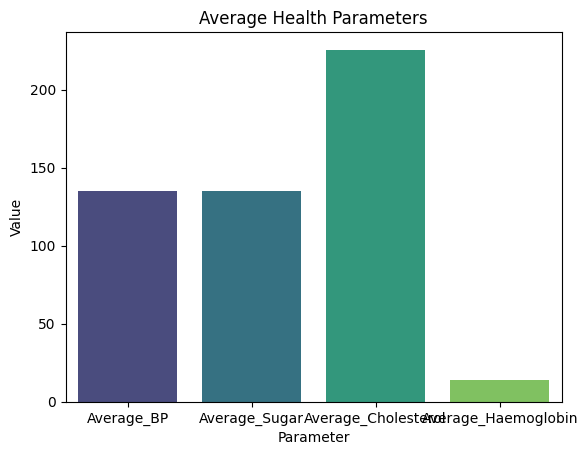

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html
import os
from google.colab import files

# Install Required Libraries
!pip install pyngrok dash plotly pyspark seaborn

# File Upload
uploaded = files.upload()

# Initialize Spark Session
spark = SparkSession.builder.appName("HealthMonitoringSystem").getOrCreate()

# Load Patient Data
patient_df = pd.read_csv("patients.csv")

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(patient_df)

# Data Overview
print("Total Patients:", spark_df.count())
spark_df.printSchema()
spark_df.show(5)

# Average Health Parameters Calculation
avg_df = spark_df.select(
    avg(col("BP")).alias("Average_BP"),
    avg(col("Sugar_Level")).alias("Average_Sugar"),
    avg(col("Cholesterol")).alias("Average_Cholesterol"),
    avg(col("Haemoglobin")).alias("Average_Haemoglobin")
)

avg_df.show()

# Convert to Pandas for Visualization
pd_df = avg_df.toPandas().T.reset_index()
pd_df.columns = ["Parameter", "Value"]

# Seaborn Visualization
sns.barplot(data=pd_df, x="Parameter", y="Value", palette="viridis")
plt.title("Average Health Parameters")
plt.xlabel("Parameter")
plt.ylabel("Value")
plt.show()

# Interactive Dashboard using Dash and Plotly
app = Dash(__name__)

fig = px.bar(pd_df, x="Parameter", y="Value", title="Average Health Parameters", color="Parameter")

app.layout = html.Div([
    html.H1("Health Monitoring Dashboard"),
    dcc.Graph(figure=fig)
])

# To run the dashboard without ngrok
if __name__ == "__main__":
    app.run_server(debug=False, port=8050, use_reloader=False)

spark.stop()